# ARGENTINE GOVERNMENT DATA (OIL AND GAS) Part III v2

CSV data set used in this notebook downloable at: https://bit.ly/3UwPbbG 

Data property of:
*Secretaría de Energía. Subsecretaría de Planeamiento Energético. Dirección Nacional de Escenarios y Evaluación de Proyectos. Dirección de Información Energética.Tecnología de la Información.*

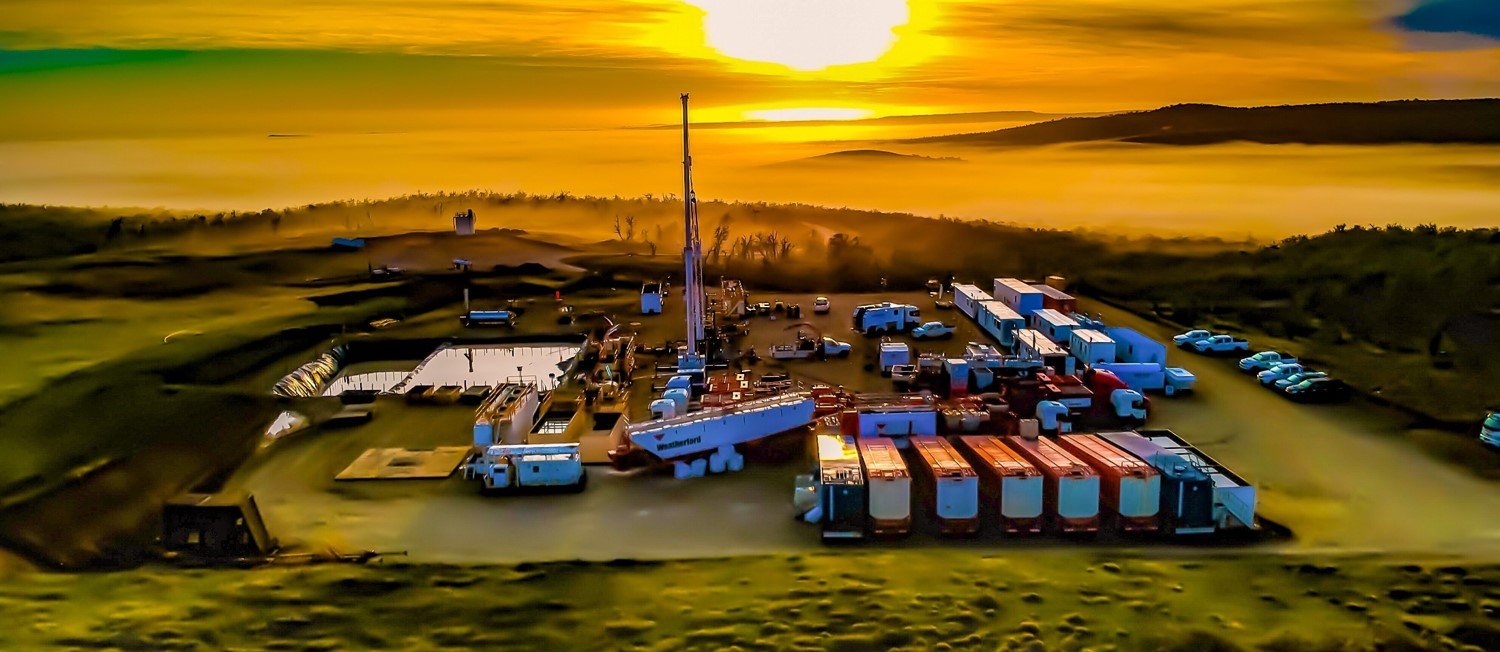

In [2]:
from IPython.display import Image
#Lago Fuego
Image('img/Lago Fuego 2009 (1).jpg', width=1200 , height=800)

# Vaca Muerta: Working in the Oil Wells whose have target VM

We will focus on Vaca Muerta formation, the most popular of Argentina.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import urllib
import missingno as msno
from termcolor import colored

# Set stylistic options for plots generated later on
sns.set_context("paper")
plt.style.use('fivethirtyeight')

In [4]:
df=pd.read_csv('df_EDA.csv')

In [5]:
df=df.drop(df.columns[0], axis=1).copy()


In this .shp file obtained from IGN, we have the entire map of Argentina plotted. However, we request that you extract only the province of Neuquén. Afterward, we will plot the wells without duplicates to create a user-friendly graph.

In [6]:
df["formacion"]=df["formacion"].str.replace(" ", "_")

In [7]:
df.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'tipoestado', 'tipopozo', 'empresa', 'sigla', 'formprod',
       'profundidad', 'formacion', 'idareapermisoconcesion',
       'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca',
       'provincia', 'long_WGS84', 'lat_WGS84', 'tipo_de_recurso', 'proyecto',
       'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data',
       'fecha', 'profundidad_filtered'],
      dtype='object')

In [8]:
df_VM=df.query("formprod== 'VMUT'")
df_VM.shape

(127801, 30)

In [9]:
df_VM_pet=df_VM.groupby(["idempresa","idpozo", "fecha","anio"])["prod_pet"].sum().reset_index()


unique=df_VM_pet['idpozo'].unique()

df_VM_tot=df_VM_pet["prod_pet"].sum()



In [10]:
#Normalizar la columna de prod pet

# Normalización min-max
min_value = df_VM_pet['prod_pet'].min()
max_value = df_VM_pet['prod_pet'].max()

df_VM_pet_norm=(df_VM_pet['prod_pet'] - min_value) / (max_value - min_value)


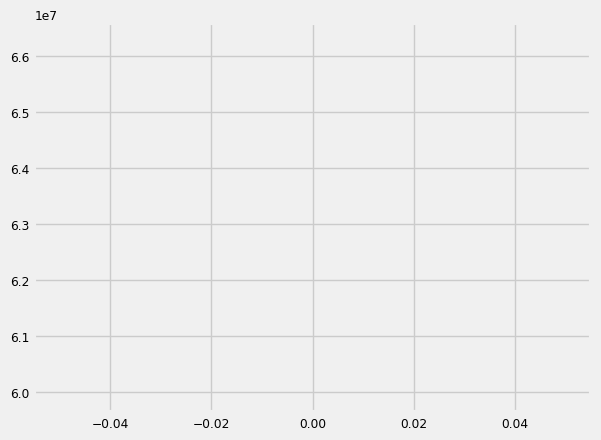

In [46]:
plt.plot(df_VM_pet)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14232\2789138407.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pozo = VM_pozo_total[df_VM_pet['idpozo'] == pozo_id]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

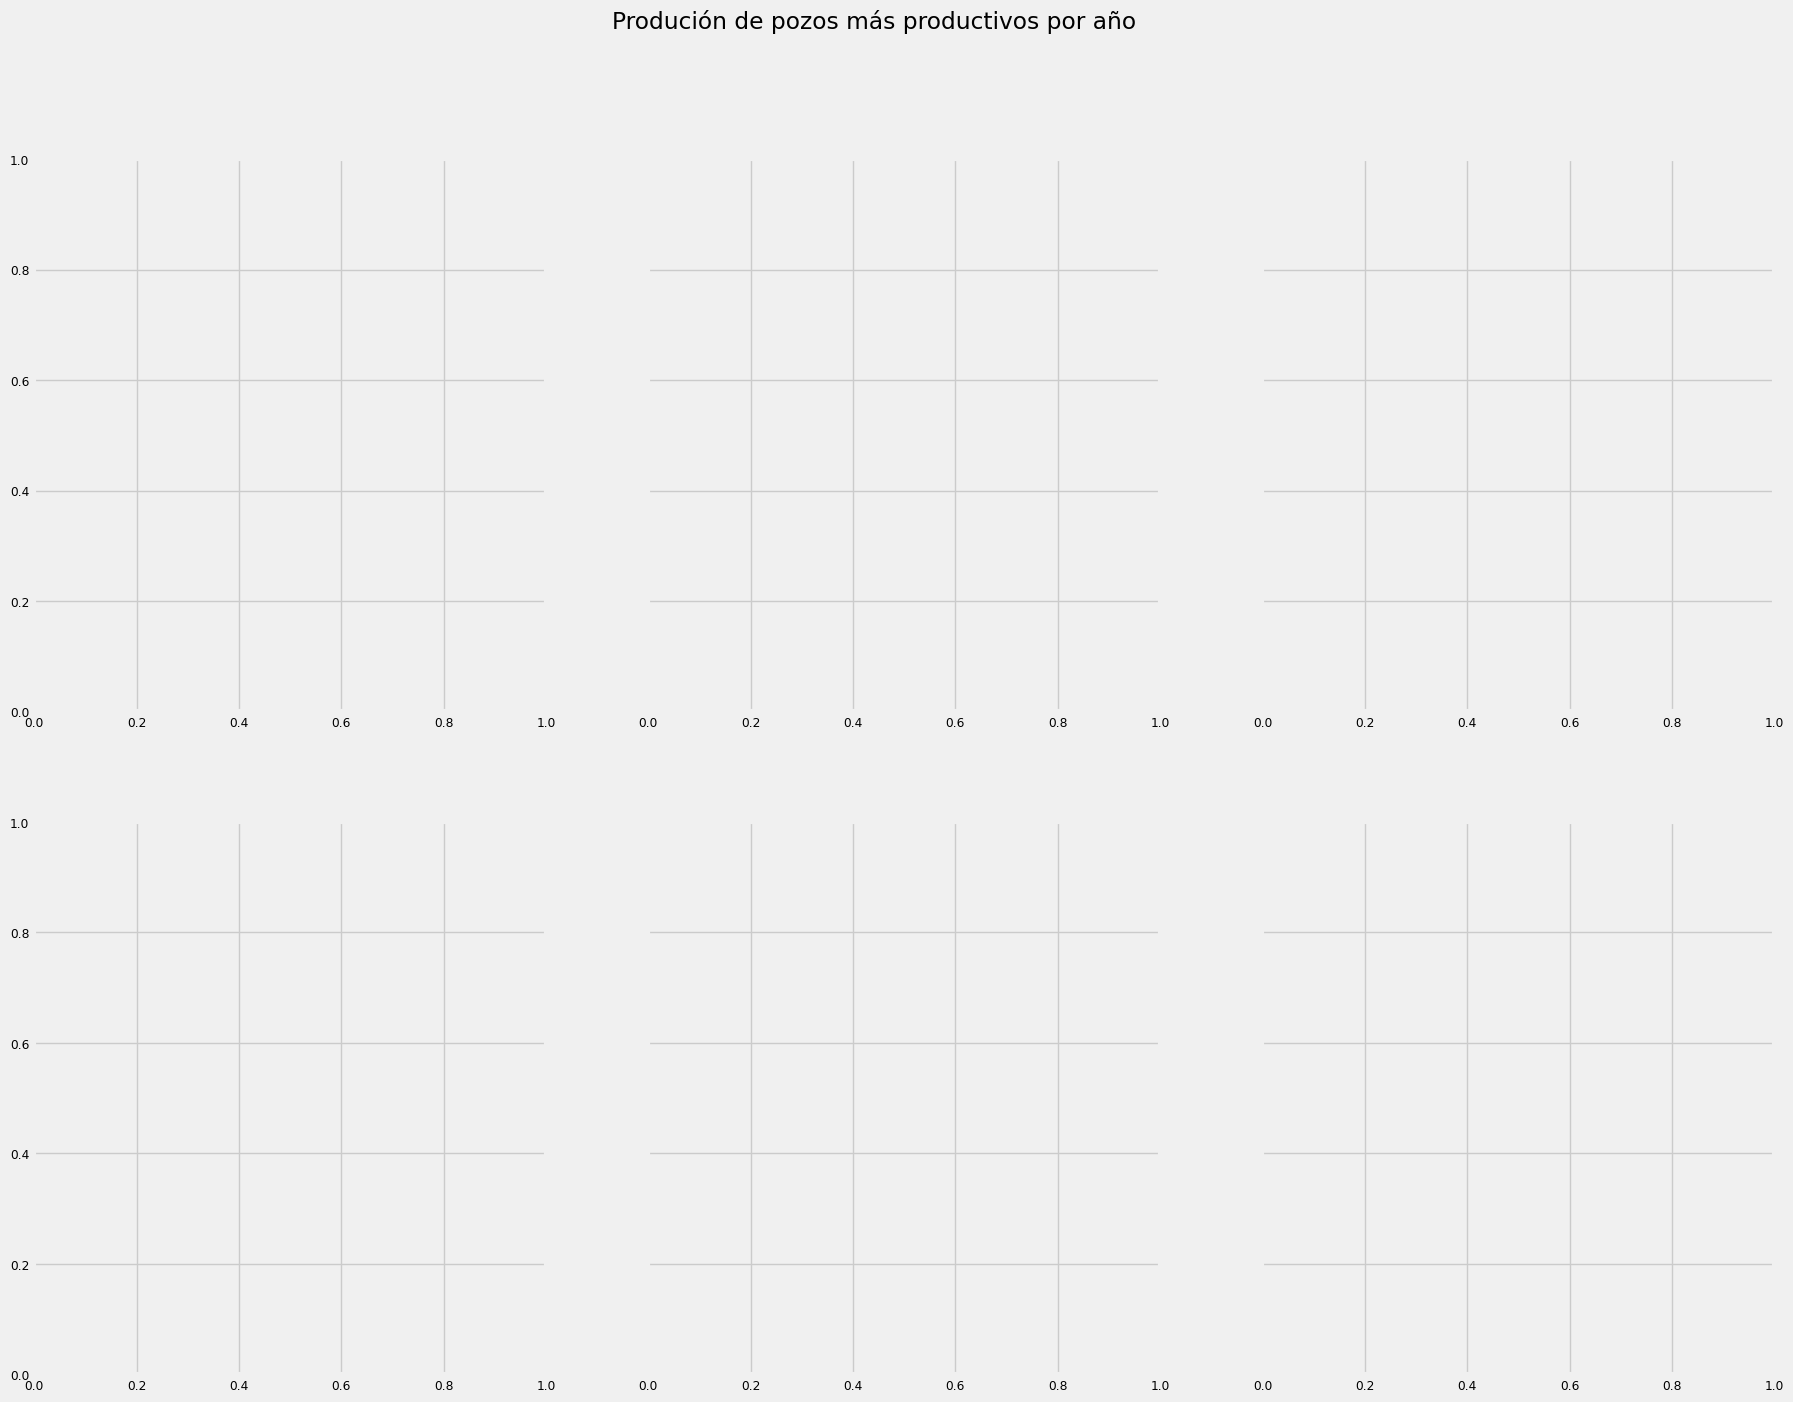

In [35]:

num_rows=len(unique)

#Find 6 most productive wells as a graphing example
VM_pozo_total=df_VM_pet.groupby("idpozo").sum().sort_values(by ='prod_pet', ascending=False).head(6)


fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharey=True)
fig.suptitle('Produción de pozos más productivos por año')
horiz = 0
vert = 0


# Itera sobre los pozos únicos en el DataFrame
for pozo_id in VM_pozo_total.index:

    # Filtra el DataFrame para el pozo específico
    df_pozo = VM_pozo_total[df_VM_pet['idpozo'] == pozo_id]

    
    
    # Crea un histograma con KDE para la producción de petróleo del pozo
    sns.barplot(data=df_pozo,
                ax=axes[vert,horiz],
                x='anio',
                y='prod_pet',
                #hue='prod_pet',
                palette="coolwarm")
    axes[vert,horiz].set_title(f' Pozo {pozo_id}')
    axes[vert,horiz].set_xlabel('anio')
    axes[vert,horiz].set_ylabel('Produccion de petroleo [$m^3$]')
    axes[vert,horiz].set_xticks([])
    axes[vert,horiz].tick_params(rotation=90)
    plt.tight_layout()  

    # Move along the subplots
    if(horiz == 2):
        horiz = 0
        vert = 1
    else:
        horiz +=1